In [47]:
import IPython
import matplotlib
%matplotlib inline
import scipy as sp
import sklearn
import numpy as np

from sklearn.datasets import load_iris

iris_dataset = load_iris()

The iris object that is returned by load_iris is a Bunch object, which is very similar to a dictionary. It contains keys and values:

In [27]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [28]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


The value of the key target_names is an array of strings, containing the species of flower that we want to predict:

In [29]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


The value of feature_names is a list of strings, giving the description of each feature:

In [30]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The data itself is contained in the target and data fields. data contains the numeric
measurements of sepal length, sepal width, petal length, and petal width in a NumPy
array:

In [31]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


The rows in the data array correspond to flowers, while the columns represent the
four measurements that were taken for each flower:

In [32]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


In [33]:
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [34]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


target is a one-dimensional array, with one entry per flower:

In [35]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


The species are encoded as integers from 0 to 2:

In [36]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The meanings of the numbers are given by the iris['target_names'] array:
0 means setosa, 1 means versicolor, and 2 means virginica.

In scikit-learn, data is usually denoted with a capital X, while labels are denoted by
a lowercase y. This is inspired by the standard formulation f(x)=y in mathematics,
where x is the input to a function and y is the output. Following more conventions
from mathematics, we use a capital X because the data is a two-dimensional array (a
matrix) and a lowercase y because the target is a one-dimensional array (a vector).

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                iris_dataset['data'], iris_dataset['target'], random_state=42)

In [38]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [39]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


In [40]:
print("First five columns of y_test:\n{}".format(y_test[:5]))

First five columns of y_test:
[1 0 2 1 1]


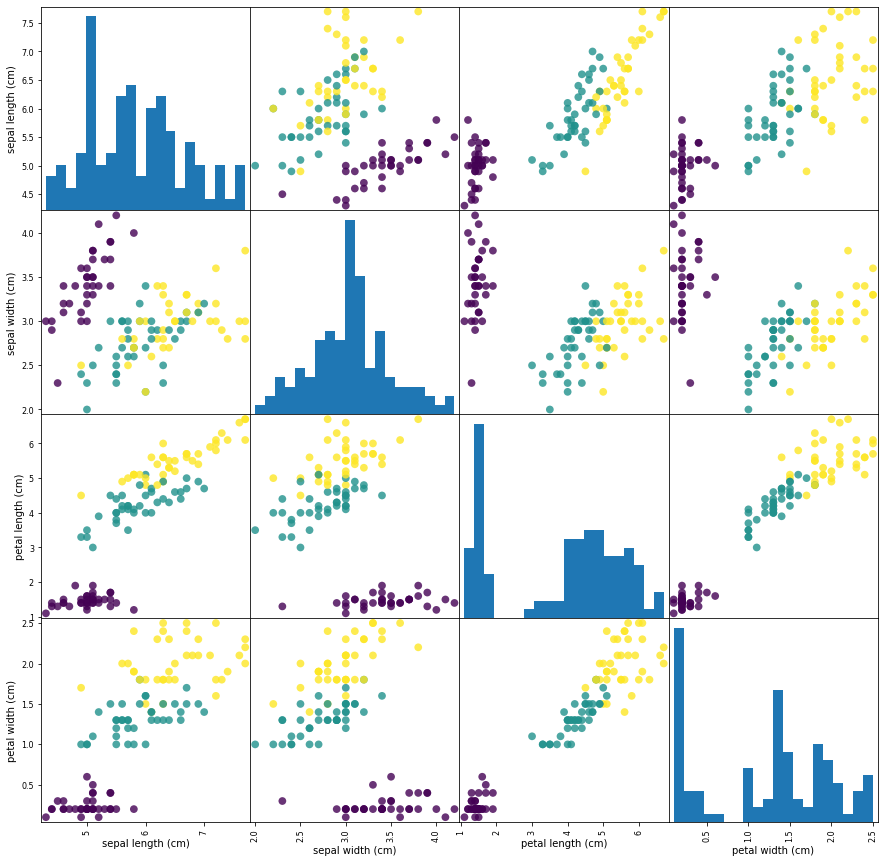

In [48]:
import pandas as pd

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8)

The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors). Then, we can make a prediction using the majority class among these neighbors. We will go into more detail about this in Chapter 2; for now, we’ll use only a single neighbor.

All machine learning models in scikit-learn are implemented in their own classes, which are called Estimator classes. The k-nearest neighbors classification algorithm is implemented in the KNeighborsClassifier class in the neighbors module. Before we can use the model, we need to instantiate the class into an object. This is when we will set any parameters of the model. The most important parameter of KNeighbor sClassifier is the number of neighbors, which we will set to 1:

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [50]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Making Predictions

We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [51]:
X_new = np.array([[5, 2.9, 1, 0.2]])

print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


To make a prediction, we call the predict method of the knn object:

In [55]:
prediction = knn.predict(X_new)

print(prediction)

print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
                                    iris_dataset['target_names'][prediction]))

[0]
Prediction: [0]
Predicted target name: ['setosa']


Evaluating the Model
This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.
Therefore, we can make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the accuracy, which is the fraction of flowers for which the right species
was predicted:

In [56]:
y_pred = knn.predict(X_test)

print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [57]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 1.00


We can also use the score method of the knn object, which will compute the test set
accuracy for us:

In [58]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 1.00
